numpy study for deep learning

In [119]:
import numpy as np
np.random.seed(5)
regen = np.random.RandomState(4)
w_ = regen.normal(0,0.01,5)
print(w_)

[ 0.00050562  0.00499951 -0.00995909  0.00693599 -0.00418302]


In [175]:
import pandas as pd
df = pd.read_csv("C:/Users/user/Downloads/iris.data",header=None)# link 가능

#setosa & versicolor를 선택함
y = df.iloc[ 0:100, 4 ]
y = np.where( y == 'Iris-setosa', -1, 1 )

#꽃받침 길이와 꽃잎 길이를 추출함.
X = df.iloc[ 0:100, [0,2] ].values



"""
X = X.tolist()
q = zip(X,y) #zip으로 하면 tuple로 붙힐 수 있음.np.hstack((X,y)), 
q=np.array(q)
q
"""

'\nX = X.tolist()\nq = zip(X,y) #zip으로 하면 tuple로 붙힐 수 있음.np.hstack((X,y)), \nq=np.array(q)\nq\n'

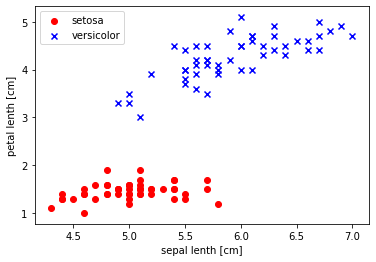

'\nu = np.arange(9)\nu = u.reshape(3,3)\nu = pd.DataFrame(u, columns=["a","b","c"], index=[7,2,5])\nu = u.values\nu = u.reshape(9)\nu.shape # == np.shape(u)\n'

In [176]:
import matplotlib.pyplot as plt

# 산점도를 그림
# 앞의 50개는 setosa임.
plt.scatter(X[:50,0], X[:50,1],
            color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0], X[50:100, 1],#좌표
            color="blue", marker='x', label="versicolor")
plt.xlabel('sepal lenth [cm]')
plt.ylabel('petal lenth [cm]')
plt.legend(loc='upper left')
plt.show()


"""
u = np.arange(9)
u = u.reshape(3,3)
u = pd.DataFrame(u, columns=["a","b","c"], index=[7,2,5])
u = u.values
u = u.reshape(9)
u.shape # == np.shape(u)
"""


In [235]:
import numpy as np
class Perceptron():
    """퍼셉트론 분류기
    
    parameter
    --------------
    eta : float
        학습률(0.0~1.0사이 존재)
    n_iter : int
        훈련 데이터셋 반복 횟수
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 seed
        
    속성<class가 가진 data attribute>,method를 호출해서 만든 속성은 _를 추가
    -------------
    w_ : 1d-array
        학습된 가중치
    errors_ : list
        에포크<학습 횟수>마다 누적된 분류 오류 -> 틀린 횟수
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """훈련 데이터 학습
        
        parameter
        ----------
        X : {array-like}, shape == (n_samples,n_features) -> index
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like , shape == (n_samples)
            타깃 값
        
        변환값
        -------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state) #난수 생성기 seed 설정 np.random 객체 느낌.
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])#난수 생성기에 정규분포 loc == mean, scale == 표준편차, size == vector크기.
                                                  #이렇게 w 가중치를 format해놓는 이유는 가중치가 0이 아니어야 됨
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
        """최종입력(netinput) 계산"""
        return np.dot(X,self.w_[1:]) + w_[0]
        
    def predict(self,X):
        """단위 계산 함수<활성화 함수의 종류>를 사용하여, 클래스 레이블을 반환"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


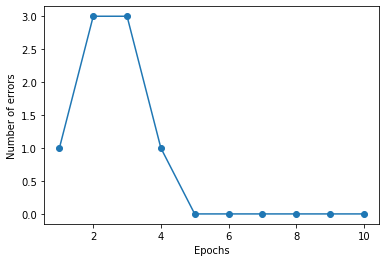

In [249]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) +1),
         ppn.errors_, marker="o")
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

In [250]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    #마커와 컬러맵을 설정
    markers = ('s','x','o','^','v')
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #결정 경계를 그림
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,0].min() - 1, X[:,0].max() + 1
